<a href="https://colab.research.google.com/github/mrigankapaul-dhubri/Praxis_AML_sessions/blob/main/Two_stage_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import cut_tree, linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
data, cluster = make_blobs(n_samples=10000, n_features=10, random_state=123)

In [ ]:
data_norm = StandardScaler().fit_transform(data)

In [ ]:
km = KMeans(n_clusters=200, n_init=40, random_state=123)
km.fit(data_norm)

KMeans(n_clusters=200, n_init=40, random_state=123)

In [ ]:
km.cluster_centers_

array([[ 0.25423908,  0.95103673,  1.24199772, ..., -0.39543501,
        -0.72160941,  0.61230741],
       [ 1.00736233, -1.45031973, -1.30909647, ...,  1.42280935,
         0.12995959, -1.29834549],
       [-0.97826675,  0.43855264,  0.04458381, ..., -0.709076  ,
         0.7149738 ,  0.08581033],
       ...,
       [ 0.51656853,  1.07458313,  1.35986363, ..., -0.6773205 ,
        -0.99240556,  1.9354903 ],
       [ 0.69981939,  0.95133566,  1.58532511, ..., -0.43317568,
        -1.28340489,  0.55284223],
       [ 0.58202332, -1.37508033, -1.18170699, ...,  1.43841358,
         0.49650214, -0.19967276]])

In [ ]:
Z = linkage(y=km.cluster_centers_, method='complete')

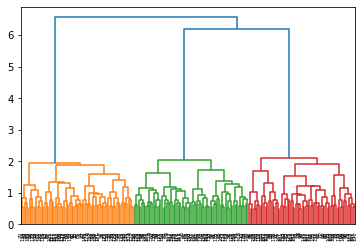

In [ ]:
d = dendrogram(Z)

In [ ]:
hc_clust = cut_tree(Z, height=4)

In [ ]:
km.labels_

array([124,   8,  15, ...,  77,  83,  38], dtype=int32)

In [ ]:
data_norm_df = pd.DataFrame(data_norm, columns=['V'+str(i) for i in range(10)])
data_norm_df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.702926,0.858796,1.054981,0.946654,0.910644,-1.032156,-0.276690,-0.546081,-1.336667,1.902197
1,-1.326878,0.838372,-0.272566,-1.687454,-1.428606,1.137773,-1.063246,-0.943224,0.537123,0.858036
2,-1.219678,0.608590,-0.167867,-1.171572,-1.478687,1.164170,-1.014088,-0.599952,0.640382,0.059415
3,-1.424977,0.488406,-0.259981,-1.148666,-1.241827,0.982564,-1.069941,-0.689794,0.550985,0.661470
4,-1.041686,0.570104,0.093454,-1.812538,-1.542426,1.067389,-1.060071,-0.511629,1.054473,-0.041425


In [ ]:
data_norm_df['km_clust'] = km.labels_

In [ ]:
km_clust_centers = pd.DataFrame(km.cluster_centers_, columns=['V'+str(i) for i in range(10)])

In [ ]:
km_clust_centers.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.254239,0.951037,1.241998,0.763354,0.366073,-1.148871,-0.399479,-0.395435,-0.721609,0.612307
1,1.007362,-1.450320,-1.309096,0.428476,0.577599,-0.785580,1.328234,1.422809,0.129960,-1.298345
2,-0.978267,0.438553,0.044584,-1.539654,-1.402660,1.267246,-0.953696,-0.709076,0.714974,0.085810
3,0.490835,0.963543,1.283217,0.781622,0.753059,-0.887675,-0.424400,-0.343877,-1.630305,1.094934
4,0.727552,-1.196643,-1.358802,0.642591,0.485242,-0.251124,1.365749,1.395749,0.716386,-1.321867


In [ ]:
km_clust_centers['km_clust'] = list(range(200))

In [ ]:
km_clust_centers.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust
0,0.254239,0.951037,1.241998,0.763354,0.366073,-1.148871,-0.399479,-0.395435,-0.721609,0.612307,0
1,1.007362,-1.450320,-1.309096,0.428476,0.577599,-0.785580,1.328234,1.422809,0.129960,-1.298345,1
2,-0.978267,0.438553,0.044584,-1.539654,-1.402660,1.267246,-0.953696,-0.709076,0.714974,0.085810,2
3,0.490835,0.963543,1.283217,0.781622,0.753059,-0.887675,-0.424400,-0.343877,-1.630305,1.094934,3
4,0.727552,-1.196643,-1.358802,0.642591,0.485242,-0.251124,1.365749,1.395749,0.716386,-1.321867,4


In [ ]:
data_norm_df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust
0,0.702926,0.858796,1.054981,0.946654,0.910644,-1.032156,-0.276690,-0.546081,-1.336667,1.902197,124
1,-1.326878,0.838372,-0.272566,-1.687454,-1.428606,1.137773,-1.063246,-0.943224,0.537123,0.858036,8
2,-1.219678,0.608590,-0.167867,-1.171572,-1.478687,1.164170,-1.014088,-0.599952,0.640382,0.059415,15
3,-1.424977,0.488406,-0.259981,-1.148666,-1.241827,0.982564,-1.069941,-0.689794,0.550985,0.661470,8
4,-1.041686,0.570104,0.093454,-1.812538,-1.542426,1.067389,-1.060071,-0.511629,1.054473,-0.041425,2


In [ ]:
km_clust_centers['hc_clust'] = hc_clust

In [ ]:
km_clust_centers.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust,hc_clust
0,0.254239,0.951037,1.241998,0.763354,0.366073,-1.148871,-0.399479,-0.395435,-0.721609,0.612307,0,0
1,1.007362,-1.450320,-1.309096,0.428476,0.577599,-0.785580,1.328234,1.422809,0.129960,-1.298345,1,1
2,-0.978267,0.438553,0.044584,-1.539654,-1.402660,1.267246,-0.953696,-0.709076,0.714974,0.085810,2,2
3,0.490835,0.963543,1.283217,0.781622,0.753059,-0.887675,-0.424400,-0.343877,-1.630305,1.094934,3,0
4,0.727552,-1.196643,-1.358802,0.642591,0.485242,-0.251124,1.365749,1.395749,0.716386,-1.321867,4,1


In [ ]:
final_data = pd.merge(data_norm_df,km_clust_centers[['km_clust','hc_clust']], on='km_clust')

In [ ]:
final_data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust,hc_clust
0,0.702926,0.858796,1.054981,0.946654,0.910644,-1.032156,-0.276690,-0.546081,-1.336667,1.902197,124,0
1,0.513775,0.762029,1.100479,0.478360,0.786829,-0.918777,-0.336732,-0.342569,-1.189173,1.647111,124,0
2,0.628636,0.835910,1.154042,0.877423,0.914856,-1.078844,-0.300791,-0.212958,-1.464551,1.461667,124,0
3,0.838008,0.912823,1.028329,0.546900,0.792277,-1.273692,-0.518611,-0.238230,-1.513496,1.731969,124,0
4,0.621122,1.383751,0.975965,0.810944,1.302804,-0.668850,-0.487530,-0.453162,-1.577890,1.644498,124,0


In [ ]:
data_df = pd.DataFrame(data, columns=['V'+str(i) for i in range(10)])

In [ ]:
data_df['km_clust'] = final_data['km_clust']
data_df['hc_clust'] = final_data['hc_clust']

In [ ]:
data_df.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust,hc_clust
0,3.444498,6.678248,3.697803,2.935107,5.183531,-3.892327,-1.745932,-5.320965,-4.349678,4.584119,124,0
1,-3.117798,6.577453,-1.880787,-10.362209,-2.324668,4.058152,-7.192170,-7.188013,-0.060621,2.268987,124,0
2,-2.771224,5.443410,-1.440821,-7.757970,-2.485411,4.154871,-6.851792,-5.574224,0.175737,0.498268,124,0
3,-3.434950,4.850269,-1.827901,-7.642339,-1.725170,3.489477,-7.238526,-5.996589,-0.028892,1.833157,124,0
4,-2.195782,5.253473,-0.342706,-10.993647,-2.689992,3.800273,-7.170187,-5.158997,1.123581,0.274685,124,0


In [ ]:
data_df.groupby('hc_clust').mean()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,km_clust
hc_clust,,,,,,,,,,,
0,1.135213,2.366737,-0.808757,-1.916715,2.202544,-0.009266,0.192105,-2.715663,-1.266981,0.324242,99.885689
1,1.173658,2.559132,-0.636580,-1.851277,2.261121,-0.147748,0.004294,-2.885178,-1.339597,0.432380,94.535693
2,1.207006,2.393646,-0.760938,-1.763177,2.318353,-0.174698,0.313399,-2.660302,-1.263652,0.342958,97.421542
